# Fipy ternary electrolyte 4 Eq

At steady-state, For species i=1,2,3:
    
$$ \nabla \cdot(z_i C_i \nabla \phi + \nabla C_i) = 0$$

One species may be eliminated using electroneutrality:

$$ \sum_i{z_i C_i}=0 $$

Boundary conditions (1D):
 - $ C_1(0)=0 $
 - $ C_1(1)=1.0  $
 - $ \phi(1)=0 $
 - $ C_2(1)=4/3  $
 - Flux of species 2 and 3:$\quad z_2 C_2 \nabla \phi + \nabla C_2 = z_3 C_3 \nabla \phi + \nabla C_3 = 0 $

In [1]:
%matplotlib inline
from fipy import *
from fipy.tools import numerix
import matplotlib.pyplot as pl
import numpy as np

## Parameters

In [2]:
nx=50
C20=4.0/3.0
z1, z2, z3= 2.0, -2.0, 1.0

## Mesh

In [3]:
mesh = Grid1D(nx=nx, dx=1.0/nx)
xc=np.asarray(mesh.cellCenters)[0]

## Species

In [12]:
C1= CellVariable(mesh = mesh, value = 1.0)
C2= CellVariable(mesh = mesh, value = C20)
Phi = CellVariable(mesh = mesh, value = 0)

# electroneutrality
C30 = -1/z3 * (z1*1.0 + z2*C20)
C3= CellVariable(mesh = mesh, value = C30)

## Boundary Conditions

In [13]:
#Concentration BC's
C1.constrain(1.0, mesh.facesRight)
C1.constrain(0.0, mesh.facesLeft)

C2.constrain(C20, mesh.facesRight)

Phi.constrain(0, mesh.facesRight)

# Other boundary conditions are:
#  - Flux of species 2 = 0 
#  - Flux of species 3 = 0

## Governing Equations

In [14]:
Eq1 = + DiffusionTerm(coeff=z1*C1, var=Phi) + DiffusionTerm(coeff=1.0, var=C1)
Eq2 = + DiffusionTerm(coeff=z2*C2, var=Phi) + DiffusionTerm(coeff=1.0, var=C2)
Eq3 = + DiffusionTerm(coeff=z3*C3, var=Phi) + DiffusionTerm(coeff=1.0, var=C3)

Eq4 = ImplicitSourceTerm(coeff=z1, var=C1) + \
      ImplicitSourceTerm(coeff=z2, var=C2) + \
      ImplicitSourceTerm(coeff=z3, var=C3)  


Eqns = Eq1 & Eq2 & Eq3 & Eq4

## Solution

In [15]:
res = 1e+10
restol= 5
itmax=5

while (res > restol) and (iter < itmax):
    res = Eqns.sweep()
    iter += 1
    print(res)

100.0
632.7276590457711
4177.269584939603
36140.74149081481


## Plot Solution

## Analytical Solution
From West Section 5.7

A. C. West, Electrochemistry and Electrochemical Engineering: An Introduction (CreateSpace Independent Publishing Platform, 2012).

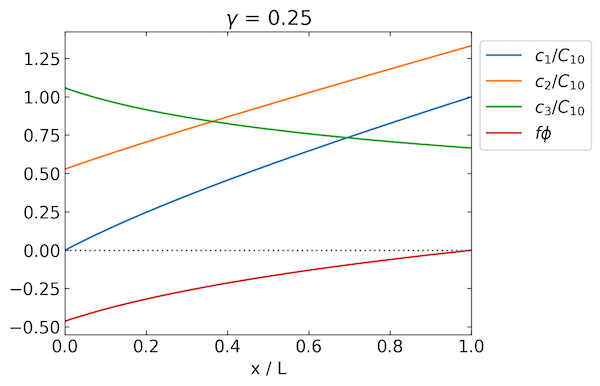